# 99-CV-Similar Apps By Rating And Category

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

import math 

from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# from kmodes.Kprototypes import KPrototypes
from kmodes.kprototypes import KPrototypes

## Data Reading and Preparation

In [2]:
data = pd.read_csv('googleplaystoremaster.csv')
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [3]:
data.shape

(10841, 13)

In [4]:
data['Category'].nunique()

34

In [5]:
data['Category'].unique()


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [6]:
data[data['Category']== '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
data = data[data['Category']!= '1.9']
data.shape

(10840, 13)

In [8]:
data = data.filter(items=['Category', 'Rating'])
data.head()

,Category,Rating
0,ART_AND_DESIGN,4.1
1,ART_AND_DESIGN,3.9
2,ART_AND_DESIGN,4.7
3,ART_AND_DESIGN,4.5
4,ART_AND_DESIGN,4.3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  10840 non-null  object 
 1   Rating    9366 non-null   float64
dtypes: float64(1), object(1)
memory usage: 254.1+ KB


In [10]:
data = data.dropna()
data.shape

(9366, 2)

In [11]:
data['Rating'].min()

1.0

In [12]:
data['Rating'].max()

5.0

In [13]:
data = data[(data['Rating'] >= 3.8) & (data['Rating'] <= 4.8)]
data.shape

(7696, 2)

In [14]:
data['Category'].nunique()

33

In [15]:
data = data.reset_index(drop=True)
data.tail()

,Category,Rating
7691,BOOKS_AND_REFERENCE,4.8
7692,FAMILY,4.0
7693,FAMILY,4.5
7694,BOOKS_AND_REFERENCE,4.5
7695,LIFESTYLE,4.5


## K-prototypes Clustering for Mixed Categorical and Numerical data

In [19]:
clusters = KPrototypes().fit_predict(data, categorical=[0])

In [20]:
clusters

array([5, 2, 4, ..., 3, 0, 0], dtype=uint16)

In [21]:
np.unique(clusters)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=uint16)

In [22]:
len(clusters)

7696

In [23]:
len(np.unique(clusters))

8

In [24]:
df_clusters = pd.DataFrame(clusters, columns=['Cluster'])

In [25]:
data = pd.merge(data, df_clusters, how="outer", left_index=True, right_index=True)
data


,Category,Rating,Cluster
0,ART_AND_DESIGN,4.1,5
1,ART_AND_DESIGN,3.9,2
2,ART_AND_DESIGN,4.7,4
3,ART_AND_DESIGN,4.5,0
4,ART_AND_DESIGN,4.3,7
...,...,...,...
7691,BOOKS_AND_REFERENCE,4.8,0
7692,FAMILY,4.0,5
7693,FAMILY,4.5,3
7694,BOOKS_AND_REFERENCE,4.5,0


In [26]:
data.shape

(7696, 3)

## Visualization

Text(0.5, 1.0, 'App distribution over clusters')

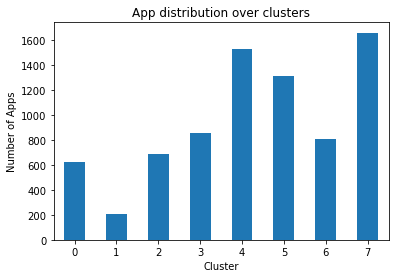

In [27]:
df_clusters.Cluster.value_counts().plot(kind='bar', rot=0)
plt.ylabel('Number of Apps')
plt.xlabel('Cluster')
plt.title('App distribution over clusters')

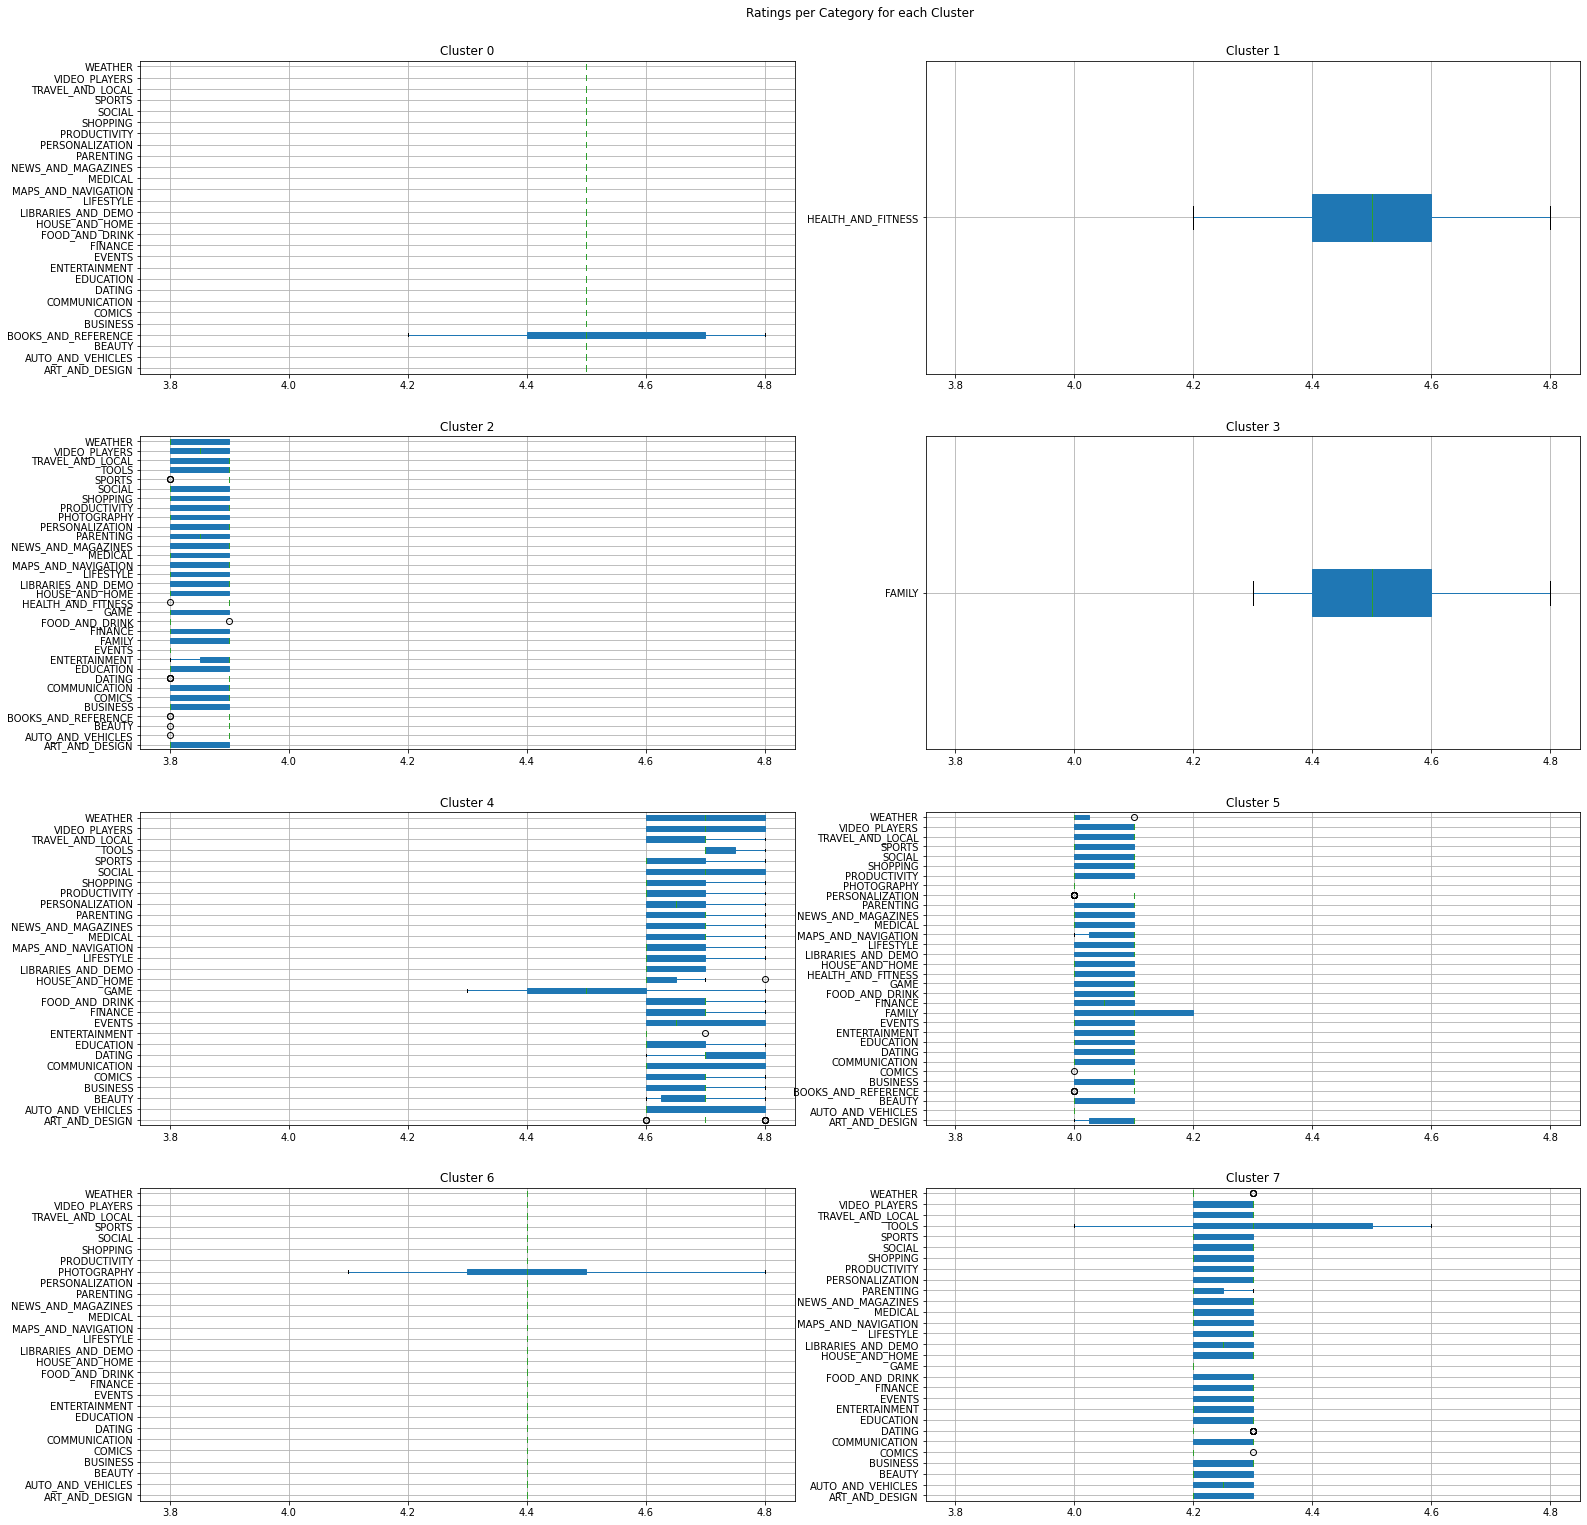

In [28]:
fig, axes = plt.subplots(nrows=math.ceil(len(np.unique(clusters))/2), ncols=2, figsize=(25,25), sharex=True)

for i in range(len(np.unique(clusters))):
    data[data['Cluster'] == i].boxplot(column='Rating', by='Category', ax=axes[i//2, i%2], vert=False, patch_artist=True) 
    axes[i//2, i%2].set_title('Cluster {}'.format(i))

for a in fig.axes:
    a.tick_params(
    axis='x',           
    which='both',       
    bottom=True,
    top=False,
    labelbottom=True)    

for a in fig.axes:
    a.xaxis.label.set_visible(False)

fig.suptitle("Ratings per Category for each Cluster")   
fig.subplots_adjust(top=.95)


Text(0.5, 1.0, 'Clusters per Category')

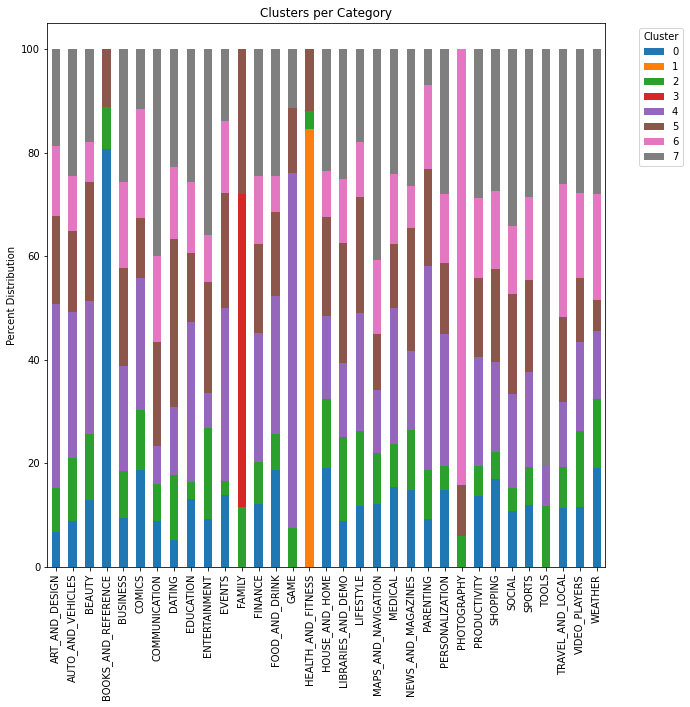

In [29]:
pd.crosstab(data['Category'], data['Cluster']).apply(lambda r: r/r.sum()*100, axis=1).plot.bar(figsize=(10,10),stacked=True, rot=90)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.0), title="Cluster")
plt.xlabel('')
plt.ylabel('Percent Distribution')
plt.title('Clusters per Category')

Text(0.5, 1.0, 'Categories per Cluster')

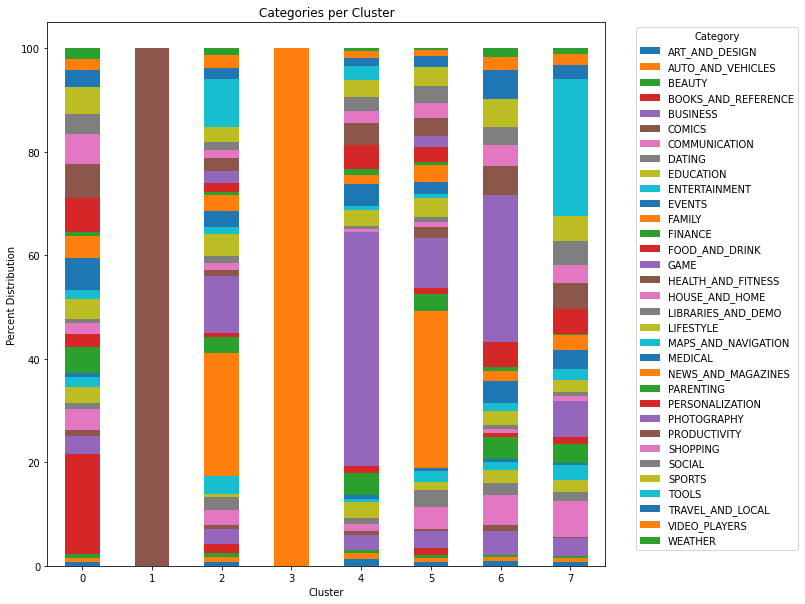

In [30]:
pd.crosstab(data['Cluster'], data['Category']).apply(lambda r: r/r.sum()*100, axis=1).plot.bar(figsize=(10,10),stacked=True, rot=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), title="Category")
plt.xlabel('Cluster')
plt.ylabel('Percent Distribution')
plt.title('Categories per Cluster')

Text(0.5, 0, '')

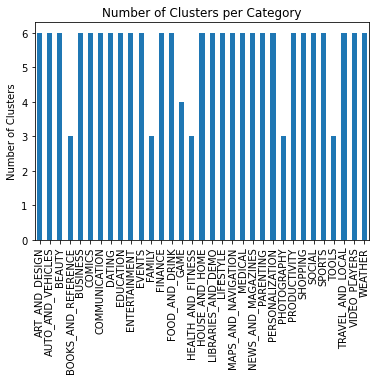

In [31]:
data.groupby('Category')['Cluster'].nunique().plot(kind="bar")
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters per Category')
plt.xlabel('')

Text(0.5, 1.0, 'Number of Categories per Cluster')

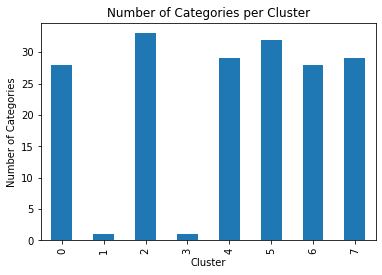

In [32]:
data.groupby('Cluster')['Category'].nunique().plot(kind="bar")
plt.ylabel('Number of Categories')
plt.title('Number of Categories per Cluster')